In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [ ]:
#Lo primero que debemos hacer es cargar la base de datos a usar. En nuestro caso contiene informacion sobre clientes de un banco y corresponde
#al conjunto de entrenamiento para un algoritmo de Machine Learning:

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bases de Datos/Clasificación de clientes de banco - Train.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

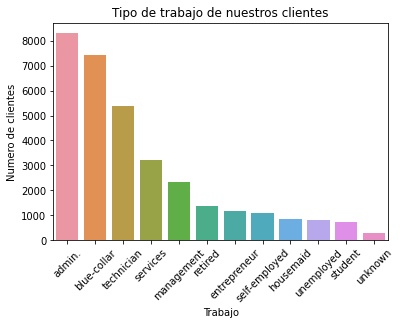

In [ ]:
#Vamos a analizar como se distribuyen los registros de algunos de los atributos de nuestra base de datos:

#Tipos de trabajo de los clientes:

x=df["job"]
y=df["job"].value_counts()

fig, ax = plt.subplots() #En realidad no necesitamos agregar esta linea pero para acostumbrarme la agrego igual.
client_jobs = sns.barplot(y.index, y, data=df)
ax.set(xlabel='Trabajo', ylabel='Numero de clientes', title='Tipo de trabajo de nuestros clientes')
plt.xticks(rotation=45)

Las edades van desde 17 hasta 98


[Text(0, 0.5, 'Número de clientes'),
 Text(0.5, 0, 'Edades'),
 Text(0.5, 1.0, 'Distribución de edades de los clientes')]

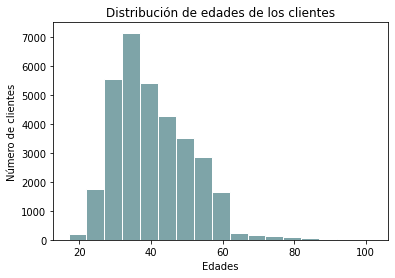

In [ ]:
#Edad de los clientes:

#Elegimos usar un histograma para representar las edades de los clientes. Para saber que tamaño de bins usar veamos
#entre que alores se encuentran las edades:

print("Las edades van desde", df["age"].min(), "hasta", df["age"].max())

fig, ax = plt.subplots()
client_ages = sns.histplot(data=df, x=df["age"], binwidth=5, color="#53868B", edgecolor="white")
ax.set(xlabel="Edades", ylabel="Número de clientes", title="Distribución de edades de los clientes")

[Text(0, 0.5, 'Contacts'),
 Text(0.5, 0, 'Month'),
 Text(0.5, 1.0, 'Number of contacts')]

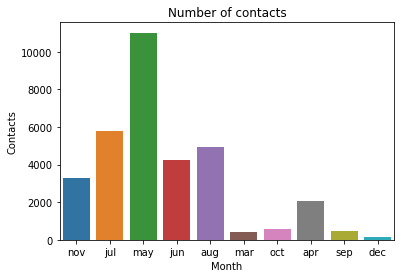

In [ ]:
# Mes en el que ocurrió el último contacto:

fig, ax = plt.subplots()
sns.countplot(x = df['month'])
ax.set(xlabel = 'Month' , ylabel = 'Contacts' , title = 'Number of contacts')

In [ ]:
#  Duración del último contacto:

df[['duration']].describe()

,duration
count,32950.000000
mean,258.127466
std,258.975917
min,0.000000
25%,103.000000
50%,180.000000
75%,319.000000
max,4918.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribución de la duración')

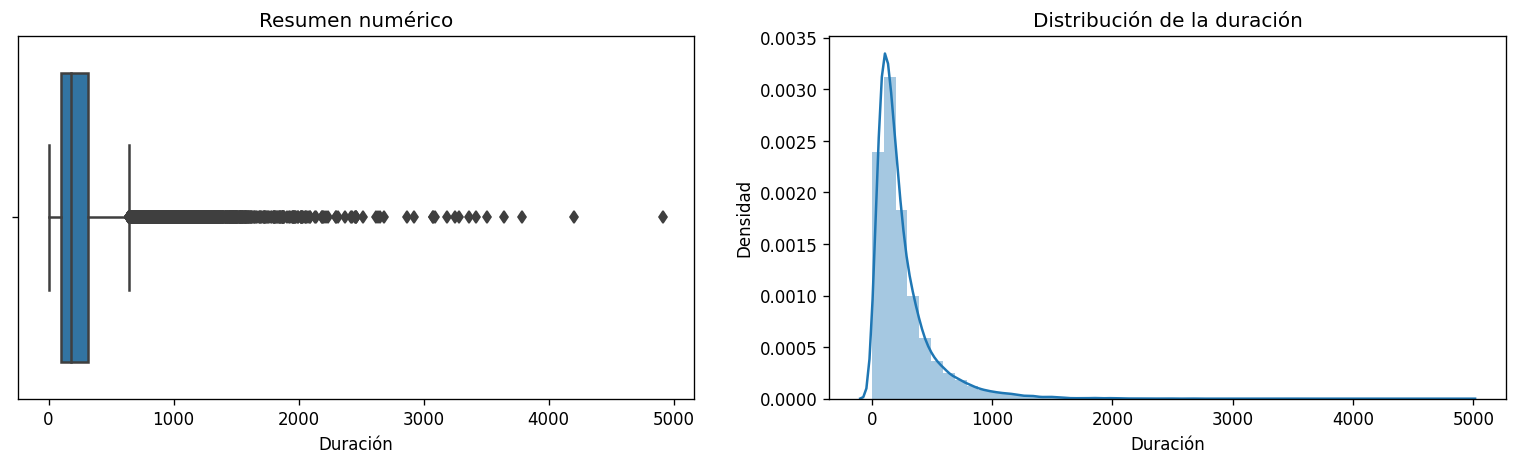

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, dpi = 120, figsize =(16,4))

plot0 = sns.boxplot(x = df['duration'], ax = ax[0])
ax[0].set_xlabel('Duración')
ax[0].set_title('Resumen numérico')

plot1 = sns.distplot(x=df['duration'], ax = ax[1]) #bw_adjust=0.1
ax[1].set_xlabel('Duración')
ax[1].set_ylabel('Densidad')
ax[1].set_title('Distribución de la duración')
#ax.set(xlabel = 'Month' , ylabel = 'Contacts' , title = 'Number of contacts')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

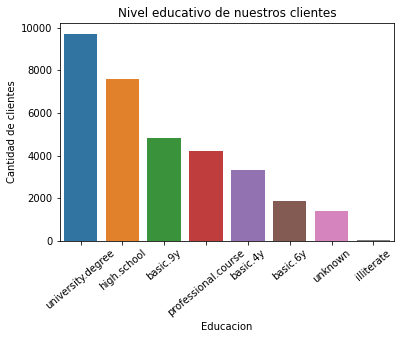

In [ ]:
#Educacion de los clientes

x=df["education"]
y=df["education"].value_counts()

fig, ax = plt.subplots()
client_education = sns.barplot(y.index, y, data=df)
ax.set(xlabel = 'Educacion', ylabel = 'Cantidad de clientes', title = 'Nivel educativo de nuestros clientes')
plt.xticks(rotation=40)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

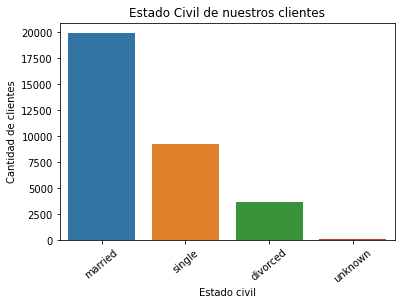

In [ ]:
#Estado civil de los clientes

x=df["marital"]
y=df["marital"].value_counts()

fig, ax = plt.subplots()
client_Marital = sns.barplot(y.index, y, data=df)
ax.set(xlabel = 'Estado civil' , ylabel = 'Cantidad de clientes' , title = 'Estado Civil de nuestros clientes')
plt.xticks(rotation=40)